### Solution 1.
Given  
$
\\ C_{1} \sim Bern( \,\frac{c_{y}}{{c_{y}}+{c_{x}}}) \,
$
$\ \Rightarrow \ pmf \ f_{C_{1}}( \,t) \, = \left\{
                                 \begin{array}\\
                                 \frac{c_{x}}{{c_{y}}+{c_{x}}} \ if \ t = 0 \\
                                 \frac{c_{y}}{{c_{y}}+{c_{x}}} \ if \ t = 1
                                 \end{array}
                                 \right.
$
$
\\ C_{2} \sim Bern( \,p_{y}) \,
\\ \Rightarrow \ pmf \ f_{C_{1}}( \,t) \, = \left\{
                                 \begin{array}\\
                                 1 \ - \ p_{y} \ if \ t = 0 \\
                                 p_{y} \ \ \ \ \ \ \ \ \ if \ t = 1
                                 \end{array}
                                 \right.
$
$
\\ C_{3} \sim Bern( \,p_{x}) \,
\\ \Rightarrow \ pmf \ f_{C_{1}}( \,t) \, = \left\{
                                 \begin{array}\\
                                 1 \ - \ p_{x} \ if \ t = 0 \\
                                 p_{x} \ \ \ \ \ \ \ \ \ if \ t = 1
                                 \end{array}
                                 \right.
$
We have to prove $\ Y \sim Bern( \, \frac{c_{y} * p_{y}}{{c_{y} * p_{y}} + {c_{x} * p_{x}}} ) \, \\ $
From the algorithm it can be deduced that
$$
\\f_{Y} ( \, t ) \, = P ( \, Y = t ) \, = \left\{
                                  \begin{array}\\
                                  P ( \, C_{1} = 1 ) \, P ( \, C_{2} = 1 ) \, = \frac{c_{y}*p_{y}}{{c_{y}}+{c_{x}}} \ if \ t = 1 \\
                                  P ( \, C_{1} = 0 ) \, P ( \, C_{3} = 1 ) \, = \frac{c_{x}*p_{x}}{{c_{y}}+{c_{x}}} \ if \ t = 0
                                 \end{array}
                                 \right.
$$
Hence, $ Y \sim Bern( \, \frac{c_{y} * p_{y}}{c_{y} + c_{x}} ) \, \\$
From the property of pmf that summation of pmf of discrete R.V. over the support is 1 that is 
$ \ P (Y = 1) + P(Y = 0) = 1 \ $
we get,
$ \\ c_{y} p_{y} \ + \ c_{x} p_{x} = 1 . $
By using this result we get    
$\ Y \sim Bern( \frac{c_{y} * p_{y}}{{c_{y} * p_{y}} + {c_{x} * p_{x}}} ) \\ $

Now we need to find the probabilty distribution of the number of iterations it takes to give an output. Let $X$ be the random variable denoting the number of interations it takes to give an output. We need to find $P(X=k)$. Let $P(X=k | i )$ denote the conditional probability that the output is $i$ after $k$ iterations. We have, 
$$ P(X=k)=P(X=k | 1) + P(X=k | 0) $$

$$P(X=k)=\frac{c_yp_y}{c_x+c_y}\sum_{r=0}^{k-1} {{k-1} \choose r} \Big(\frac{c_y(1-p_y)}{c_x+c_y}\Big)^r \Big(\frac{c_x(1-p_x)}{c_x+c_y}\Big)^{k-1-r} + \frac{c_xp_x}{c_x+c_y}\sum_{r=0}^{k-1} {{k-1} \choose r} \Big(\frac{c_y(1-p_y)}{c_x+c_y}\Big)^r \Big(\frac{c_x(1-p_x)}{c_x+c_y}\Big)^{k-1-r}$$

$$P(X=k) = \frac{c_xp_x +c_yp_y}{{(c_x+c_y)}^k} {\big(c_x(1-p_x) + c_y(1-p_y) \big)}^k$$

### Solution 2

In [26]:
import Pkg
Pkg.add("StatsPlots")
using Distributions
using StatsPlots

   Resolving package versions...
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Manifest.toml`


In [27]:
function nDimSphere(_p)
    while true
        p = _p
        x = []
        for i in 1:p
            push!(x, rand(Uniform(-1,1)))
        end
        z = 0
        for i in 1:p
            z = z + x[i]*x[i]
        end
        if z<=1
            return x
        end
    end
end

nDimSphere (generic function with 1 method)

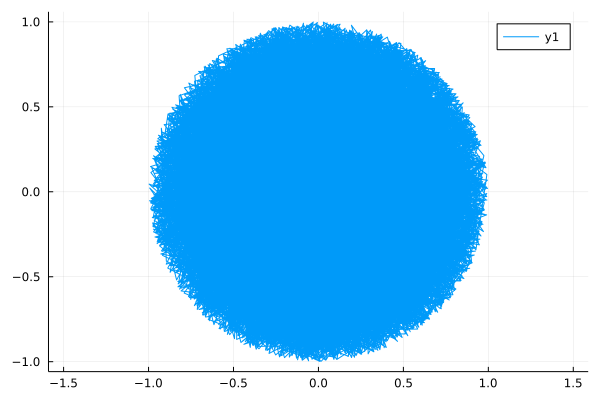

In [28]:
p=2
v = []
no_of_samples = 10000

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end

x1 = []
x2 = []
for x in v
    push!(x1, x[1])
    push!(x2, x[2])
end

L = plot(x1, x2, aspect_ratio = 1)
display(L)

In [29]:
p=3
v = []
no_of_samples = 10

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end
v

10-element Vector{Any}:
 Any[0.48753109202825273, -0.00464786592503974, -0.8660820464703347]
 Any[-0.7533583563371076, 0.14699069849950508, 0.1404436455095004]
 Any[0.6707465788087699, 0.36504037985995086, 0.29019663029911547]
 Any[-0.12014749555848225, 0.32964103835664926, 0.7946404567316214]
 Any[-0.8182035663732925, -0.07864111137190699, 0.4349487645653616]
 Any[0.3042926267699855, -0.17839437773426514, -0.3868262136718845]
 Any[0.10735523444714024, 0.18751523014890958, -0.8134769214910764]
 Any[0.22788245209172842, 0.8623129700321805, 0.07067745966398142]
 Any[-0.34176217673294684, 0.5505530157776048, 0.4400170114986428]
 Any[-0.227468761927331, -0.5524990073458578, -0.7238095232731641]

In [30]:
p=4
v = []
no_of_samples = 10

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end
v

10-element Vector{Any}:
 Any[0.20259359755167794, 0.1277813399245784, -0.4344449262140251, -0.8057483426366074]
 Any[0.08548222720538834, 0.625701986743747, -0.5555551662378471, 0.4561523220051671]
 Any[0.3853390679539066, 0.09785375704850097, 0.43946468901454105, -0.778779000670639]
 Any[-0.5258160053141454, 0.0640316336762845, 0.12267395143746374, -0.014257536605487786]
 Any[0.2668749340279737, 0.4732069808498751, 0.4045567621191928, -0.15058385154514387]
 Any[-0.09530550404755256, -0.07917444322126177, -0.5695446424540489, -0.6164775138014293]
 Any[0.07945670016578044, -0.34813110141785364, -0.2803352803005472, -0.21948439051418545]
 Any[-0.39695972213323083, 0.20145449582160468, -0.3489014258355103, 0.5451229581859314]
 Any[-0.11101375962164717, -0.5276327612441623, -0.3524571921287518, -0.19460242255890936]
 Any[0.686973805662104, 0.1918470567906252, 0.0861358620258279, 0.016450871166912684]

In [31]:
p=5
v = []
no_of_samples = 10

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end
v

10-element Vector{Any}:
 Any[0.4540350742857504, -0.40349849096760115, -0.029239860634526327, -0.49257151582624625, 0.05285922206551774]
 Any[0.5680052451474353, 0.5976278911105872, 0.16022522647304904, 0.3967079825362865, 0.24132097248820905]
 Any[-0.1648502419362632, 0.5197637278251488, 0.11881094757724697, 0.344978814524328, 0.0458296638689033]
 Any[-0.23302108148929834, -0.15505202028008336, -0.19088855351582912, 0.35100947288237694, 0.24681500050269145]
 Any[-0.04302085775761211, -0.7033926915228341, 0.22487977771788525, 0.22016239437095408, 0.01130075150998655]
 Any[-0.424200795804311, 0.003013251759491631, -0.37632125459919097, 0.6301866263913118, -0.4931648047284045]
 Any[-0.003943718108136762, 0.5741598791825175, 0.18187342042730936, -0.6485332342495236, -0.3836509938249142]
 Any[0.0603278044773099, -0.21380533849780425, -0.05829416678000965, 0.2808625700334717, -0.3702408829095387]
 Any[-0.3148305016194044, -0.041707404198163545, 0.13733385627353067, 0.30955054358880774, 0.71

In [32]:
p=6
v = []
no_of_samples = 10

while no_of_samples>0
    push!(v, nDimSphere(p))
    global no_of_samples = no_of_samples - 1
end
v

10-element Vector{Any}:
 Any[-0.5357560027347752, -0.22047362397162007, 0.23724590481370966, -0.367389167222661, 0.23792621584243112, -0.2703788416309152]
 Any[-0.2533619611618936, 0.7194172369776177, -0.23880773289379764, 0.4071278553910489, -0.22220302443036344, 0.02446023084865412]
 Any[-0.38151231676580744, 0.412339872602693, -0.07177505153053554, 0.1281891092066214, -0.16084014376920353, -0.48628415799340163]
 Any[-0.39407896084517535, 0.5608249682317461, 0.12385622067302937, -0.19591019283967448, -0.37030836153762015, 0.05792898122665391]
 Any[-0.3774470390495577, 0.20588792833380953, -0.2507317333501049, -0.0009387874140285302, -0.06514166397116128, -0.20152922221049785]
 Any[0.2922543457414688, 0.3450094710335303, 0.021797929051436515, 0.6866792594869433, -0.0071134474219873844, 0.2980264392399836]
 Any[0.4670300825188074, -0.49014806301898983, -0.19443092716834887, -0.07768911236221276, -0.254959943096994, -0.4071304694304194]
 Any[-0.17202522584822, 0.5514265636889801, -0.143

### Solution 3

In [33]:
function genTruncNormal(a) #Function to generate 1 sample from Truncated normal distribution
    prop=Normal(0,1)
    uniform=Uniform()
    accept=0
    count=0
    while (accept==0)
        u=rand(uniform)
        p=rand(prop)
        count=count+1
        c=cdf(prop,a)-cdf(prop,-a) #Value of sup(f(x)/g(x))
        if p<-a || p>a
            val=0
        else 
            val=pdf(prop,p)
        end
        if u<val/(c*pdf(prop,p))
            accept=1
            return p,count
        else 
            continue
        end 
    end  
end

genTruncNormal (generic function with 1 method)

In [34]:
a=4 #Sample from Truncated Normal distribution from -4 to +4
n_samples=100000
tn=zeros(n_samples,1)
counts_4=zeros(n_samples,1)
for i in 1:n_samples
    tn[i],counts_4[i]=genTruncNormal(a)
end

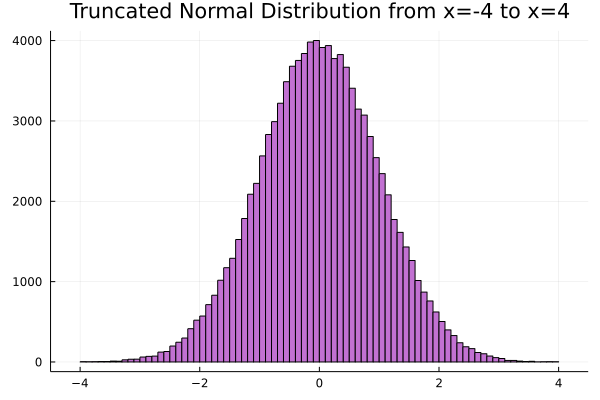

In [35]:
histogram(tn,color=4,label="",title="Truncated Normal Distribution from x=-4 to x=4")

In [36]:
findall(x->(x>4)||(x<-4),tn) #As we can see there are no values with x<-4 or x>4 in our samples

CartesianIndex{2}[]

In [37]:
print(mean(tn)) #The mean is still 0

0.007556262073102606

In [38]:
print(var(tn))

0.9970289520421628

In [39]:
c_4=1/(cdf(Normal(0,1),4)-cdf(Normal(0,1),-4))

1.0000633464961906

In [40]:
a=1 #Truncated Normal distribution from -1 to 1
n_samples=100000
tn=zeros(n_samples,1)
counts_1=zeros(n_samples,1)
for i in 1:n_samples
    tn[i],counts_1[i]=genTruncNormal(a)
end

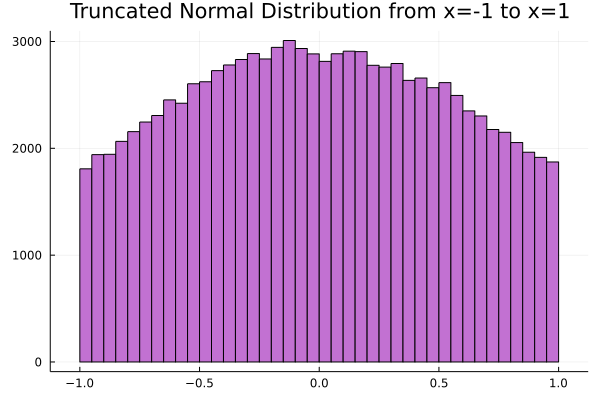

In [41]:
histogram(tn,color=4,label="", title="Truncated Normal Distribution from x=-1 to x=1")

In [42]:
findall(x->(x>a)||(x<-a),tn)

CartesianIndex{2}[]

In [43]:
mean(tn)

-0.0022184851137927054

In [44]:
c_1=1/(cdf(Normal(0,1),1)-cdf(Normal(0,1),-1))

1.4647947734915436

In [45]:
println("Avg number of loops before acceptance when a=4:", string(mean(counts_4)))
println("Avg number of loops before acceptance when a=1:", string(mean(counts_1)))
println("Value of c when a=4:", string(c_4))
println("Value of c when a=1:", string(c_1))

Avg number of loops before acceptance when a=4:1.00009
Avg number of loops before acceptance when a=1:1.46947
Value of c when a=4:1.0000633464961906
Value of c when a=1:1.4647947734915436


### What are the differences between the two settings?
As we can see, the mean number of loops required per sample for the case where a=1 is higher than the case where a=4. Intuitively, this makes sense because a Standard Normal Distribution hardly has any values beyond x=4 or below x=-4. Mathematically, this can be seen as the expected number of loops in the accept-reject algorithm is c, and as we can see c is higher for the case where a=1. Hence it is more ineffecient to draw the Truncated Normal Distribution that has a=1 in this case.